In [1]:
from my_libs_py3 import *


Bad key "text.kerning_factor" on line 4 in
/home/ken/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/home/ken/miniconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
pd.set_option('display.max_rows', 500)

## Action

In [3]:
robinhood = robingateway()

In [77]:
mongod = mongo("all_symbol","screenerModel")
    
    ## This line gets the max refresh_date
tos = pd.DataFrame(mongod.conn.table.find({},{"Refresh_Date":1,"_id":0}).sort("Refresh_Date",-1).limit(1))["Refresh_Date"].iloc[0]

fun_table = pd.DataFrame(mongod.conn.table.find({"Refresh_Date":tos},{"_id":0}))

target = ["P/Cash","Analyst Recom","P/S","Total Debt/Equity","P/Free Cash Flow","P/E","Insider Ownership",
         "Gross Margin","Current Ratio","Sales growth quarter over quarter","Profit Margin","Quick Ratio","Performance (Week)","Institutional Ownership","EPS (ttm)","Operating Margin"]

fun_table["sum_rank"] = pd.DataFrame.sum(fun_table[target],axis=1,skipna=True,numeric_only=True)

fun_table["avg_rank"] = pd.DataFrame.mean(fun_table[target],axis=1,skipna=True,numeric_only=True)

fun_table = fun_table.sort_values("avg_rank")

fun_table = fun_table.reset_index()

Connection Successful


In [58]:
i="AE"
log = get_trade_log(i)
log = log[log.Strategy=="Fundamental"]
log

Connection Successful


_id                        TimeStamp Ticker     size  \
0  60f70f34dd21568c2912eaab 2021-07-20 11:00:19.548000+00:00     AE  31.0000   
1  611bf9535b8d5b9104bc479b 2021-08-17 11:00:51.745000+00:00     AE -10.0000   

   raw_size   Price     Strategy  
0   31.0000 26.4200  Fundamental  
1  -10.0000 29.5870  Fundamental

In [59]:
get_pair_open_opsition()

Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful


['ACA_GTHX', 'ACA_DK', 'AA_RUN', 'ACC_AMH']

In [57]:
tickers = get_open_opsition()

for i in tickers:
    i.encode("ASCII")
    log = get_trade_log(i)
    log = log[log.Strategy=="Fundamental"]
    if len(log) == 0:
        continue
    else:
        print(i)

Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection Successful
Connection

In [9]:
# this is wrong because the existence of NA
fun_table["sum_rank"] = fun_table["P/Cash"] + fun_table["Analyst Recom"]  + fun_table["P/S"] + fun_table["Total Debt/Equity"] + fun_table["P/Free Cash Flow"] + fun_table["P/E"] + fun_table["Insider Ownership"] + fun_table["Gross Margin"] + fun_table["Current Ratio"] + fun_table["Sales growth quarter over quarter"] + fun_table["Profit Margin"] + fun_table["Quick Ratio"] + fun_table["Performance (Week)"] + fun_table["Institutional Ownership"] + fun_table["EPS (ttm)"] + fun_table["Operating Margin"]

fun_table["avg_rank"] = (fun_table["P/Cash"] + fun_table["Analyst Recom"]  + fun_table["P/S"] + fun_table["Total Debt/Equity"] + fun_table["P/Free Cash Flow"] + fun_table["P/E"] + fun_table["Insider Ownership"] + fun_table["Gross Margin"] + fun_table["Current Ratio"] + fun_table["Sales growth quarter over quarter"] + fun_table["Profit Margin"] + fun_table["Quick Ratio"] + fun_table["Performance (Week)"] + fun_table["Institutional Ownership"] + fun_table["EPS (ttm)"] + fun_table["Operating Margin"])/21

In [23]:
price = get_price_data(["ELP"],method = 'day',back_day=7)

All price data of Close is actually Adj Close
Connection Successful
No active exception to reraise
switching to realtimeday method
All price data of Close is actually Adj Close
('Finished', 'ELP')
('Finished', 'ELP')


In [24]:
price.Close.mean()

11.744

In [25]:
realtimequote("ELP").price.iloc[0]

11.59

In [ ]:
money = 50
for i in target_list:
    price = get_price_data([i],method = 'day',back_day=7)
    size = money
    if realtimequote(i).price.iloc[0] < price.Close.mean():
            if robinhood.place_sell_bulk_checkup(ticker_list=[i],quantity_list=[log["size"].iloc[-1]])== "Trade Success!":
                        log_trade(i,-log["size"].sum(), robinhood.get_last_price(i), strategy_name)
                        send_email("manual_cutloss sell")

In [5]:
st= pd.DataFrame(mongod.db["Stocks_info"].find())

In [10]:
#get best of each industry
new = pd.DataFrame()
for i in set(st.Industry):
    if i is None:
        continue
    temp = st[st.Industry == i].sort_values("Sharp_Ratio20",ascending = False ).iloc[0]
    new = new.append(temp)
temp = st[st.Industry != st.Industry].sort_values("Sharp_Ratio20",ascending = False ).iloc[0]
new = new.append(temp)

In [20]:
new.to_csv("file/rotation_suggestion.csv")

In [16]:
read_mongo_time(st.Refresh_Date.iloc[0]).date()

datetime.date(2020, 2, 23)

In [17]:
pd.read_csv("file/blacklist.csv").Ticker.to_list()

['HOME', 'DIVC']

In [30]:
get = pd.DataFrame()
for ind in list(set(all_stocks.Industry)):
    try:
        get = get.append(all_stocks[(all_stocks.Industry == ind) & all_stocks.PEG > 0  ].sort_values("PEG").iloc[0])
    except:
        print ("error %s"%ind)

error nan
error Networking & Communication Devices
error Manufactured Housing
error Internet Service Providers
error Consumer Services
error Exchange Traded Fund
error Computer Based Systems
error Semiconductor- Memory Chips
error Silver
error Closed-End Fund - Foreign
error Basic Materials Wholesale
error Tobacco Products, Other


All price data of Close is actually Adj Close
Connection Successful
('Finished', 'ABT')


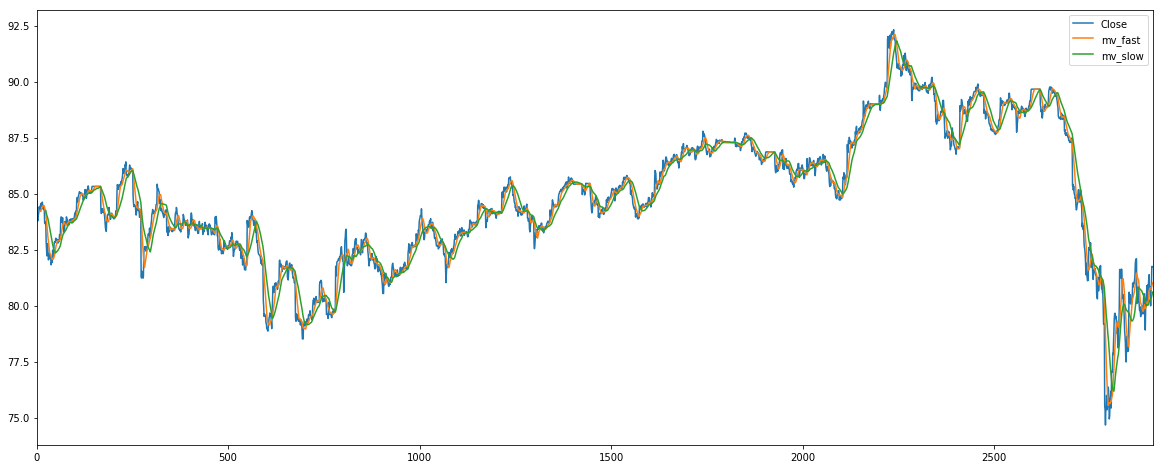

In [4]:
plot_ticker("ABT",method="self_minute", robinhood = robingateway(),past_days=200)

Stock analysis function:

- volatility
- basic price movement info
- ranking in sector and industry for important indicators
- graph

## Below test area

In [4]:
mongod = mongo("all_symbol")
info = pd.DataFrame(mongod.db["Stocks_info"].find())

Connection Successful


In [12]:
info.set_index("Ticker")[["Sharp_Ratio20"]]

Sharp_Ratio20
Ticker               
CFRUY             NaN
BRDCY             NaN
BXBLY        0.068405
SUBCY       -0.084217
NNA          0.088461
IGD          0.022719
GABC         0.104342
ERH         -0.096427
ACC         -0.157050
ABDC              NaN
REX         -0.005992
PAC         -0.289966
RMD          0.015460
BTI               NaN
AWF         -0.070594
SEKEY             NaN
SRT         -0.114244
RFIL        -0.279852
CBAY         0.016245
ALRS        -0.037674
SWZ          0.093695
SBFG        -0.266570
FGEN              NaN
FFWM        -0.044257
KF                NaN
JFR         -0.051099
NMT               NaN
MXF         -0.180303
TSI         -0.029514
NPV         -0.029484
LNT         -0.030004
KALU        -0.105463
ZNH         -0.159634
NFJ          0.068993
ACNB         0.104773
AAT         -0.175356
ARTNA        0.127528
AOD          0.015523
ASR         -0.353007
ASC          0.055510
IHRT              NaN
IFJPY       -0.228515
HYPMY             NaN
HOCPY        0.182783
ITVPY       -0.245010
ITOCY        0.125962
ITCB        -0.212764
ISNPY       -0.038886
MXE               NaN
SMFKY       -0.044662
IVAC        -0.102018
RGA         -0.043406
CEA         -0.202227
BREW         0.026279
AXR               NaN
AVD               NaN
AUDC         0.413042
ATRI         0.031556
AOSL              NaN
AMWD        -0.151510
ALLY        -0.231615
CMPR        -0.265438
NTRP         0.007463
LORL        -0.245651
VET         -0.073796
TLF         -0.134837
MFSF         0.025196
THS          0.404218
FRPT         0.046155
FISI        -0.053065
VOYA        -0.035914
FNF         -0.292570
FFNW        -0.066286
FORM         0.017869
FOR         -0.254784
UNM          0.009047
TGI         -0.184328
MYGN         0.060153
LBTYA        0.001757
KEQU        -0.157957
GWR               NaN
SA           0.123529
GPN         -0.110583
GBL         -0.205989
G           -0.097617
FLGE        -0.002666
AL          -0.102103
AAN         -0.174219
AMT         -0.039833
ALDR              NaN
AYI         -0.069278
ASML         0.029275
ARI         -0.251957
AMC         -0.011731
ACM         -0.067104
ARW         -0.057228
WWE          0.011863
WPX         -0.120212
ENB          0.058873
ECHO         0.056174
ES          -0.087983
ERIC         0.276488
IEP         -0.069835
HOV         -0.174153
PRQR        -0.072053
RE          -0.076888
EXR         -0.038419
MLI         -0.007404
HNGR        -0.163497
PZN         -0.127452
MGNX        -0.056910
PEGA        -0.010213
PRSC         0.048432
NTAP         0.141369
UEIC         0.142483
QRVO         0.005346
MSGN        -0.157492
CAT          0.279628
EVSTC             NaN
MTLS         0.336953
RADA        -0.108374
ESTE        -0.090077
EXPR              NaN
RESI        -0.054915
FMC         -0.007072
IPAR        -0.044618
EMCF              NaN
NCLH        -0.024528
HCM         -0.058519
CRBP         0.225486
HUBB         0.026904
JHS         -0.069817
ISTR        -0.205803
HMLP        -0.152271
TSC         -0.234236
WRK          0.178955
NVGS        -0.314141
LTRPA        0.044981
HENOY        0.085026
HGKGY       -0.325720
ASX         -0.074119
OTEX         0.013270
ADS         -0.219966
SAVE        -0.116048
LDL         -0.243882
AINV        -0.339579
ASH         -0.025975
ABM         -0.026978
ABMD              NaN
AON         -0.104774
ATO          0.009075
APU               NaN
ADC         -0.107043
OTTR         0.038414
PFGC        -0.083516
PRA          0.205507
RMCF        -0.319806
LPX         -0.089477
MCS         -0.132666
MLP          0.142030
MTRX        -0.091852
TDF          0.056922
CHW         -0.009599
LAND         0.021386
JBL         -0.000837
OSB         -0.192885
NXC          0.018537
NERV         0.013451
TDY          0.005006
SKYW        -0.096725
SIEN        -0.078666
ROL          0.032561
BG           0.083633
TUP         -0.203683
PMT         -0.231070
PLD          0.085625
CM           0.069512
PACB        -0.035002
BBL          0.167441
BKCC              NaN
BKE 